# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares
       If it set further lows, buy some more
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    
    (Scaling in and out)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Define the margin multiple

In [6]:
margin = 2

Run Strategy

In [7]:
s = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=85, margin=margin,
                      period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [8]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [9]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
432,2021-01-29,370.07,2021-02-05,387.71,17.64,10583.99,600,232203.70,LONG,SPY
433,2021-02-19,390.03,2021-03-10,389.58,-0.45,-279.01,620,231924.70,LONG,SPY
434,2021-02-22,387.03,2021-03-11,393.53,6.50,4036.50,621,235961.20,LONG,SPY
435,2021-03-19,389.48,2021-03-26,395.98,6.50,4101.50,631,240062.70,LONG,SPY
436,2021-03-24,387.52,2021-03-26,395.98,8.46,5346.73,632,245409.43,LONG,SPY


In [10]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-22,248857.48,246270.38,247923.60,631,199.31,1.00,-
2021-03-23,248472.56,245443.77,245973.81,631,199.31,1.00,-
2021-03-24,251329.93,244661.29,244724.42,1263,-244713.32,2.00,O
2021-03-25,248551.31,240152.37,247477.79,1263,-244713.32,1.99,-
2021-03-26,255409.43,255409.43,255409.43,0,255409.43,1.00,X


Generate strategy stats - display all available stats

In [11]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2021-03-26
beginning_balance                                            10000
ending_balance                                           255409.43
total_net_profit                                         245409.43
gross_profit                                             512418.71
gross_loss                                              -267009.28
profit_factor                                                 1.92
return_on_initial_capital                                  2454.09
annual_return_rate                                           12.57
trading_period                           27 years 4 months 15 days
pct_time_in_market                                           35.40
margin                                                           2
avg_leverage                                                  1.22
max_leverage                                                  

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

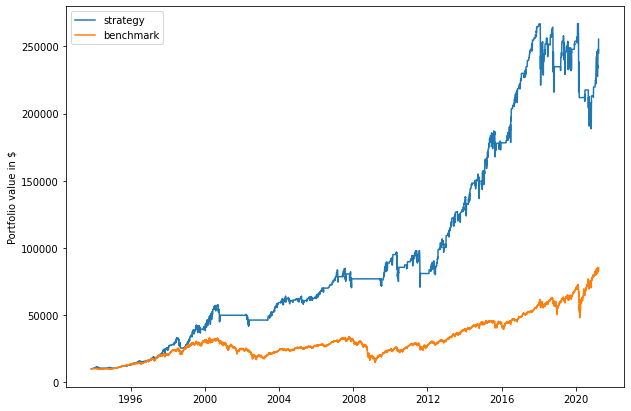

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

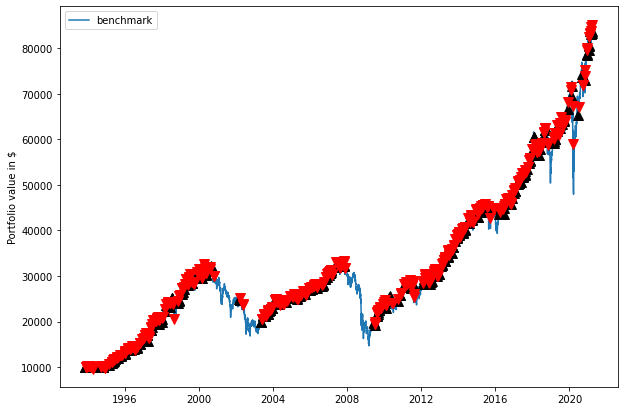

In [14]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,12.57,8.14
max_closed_out_drawdown,-29.34,-56.42
annualized_return_over_max_drawdown,0.43,0.14
best_month,23.45,23.06
worst_month,-25.68,-31.38
sharpe_ratio,0.72,0.51
sortino_ratio,0.54,0.64
monthly_std,4.02,4.52
annual_std,17.20,16.55


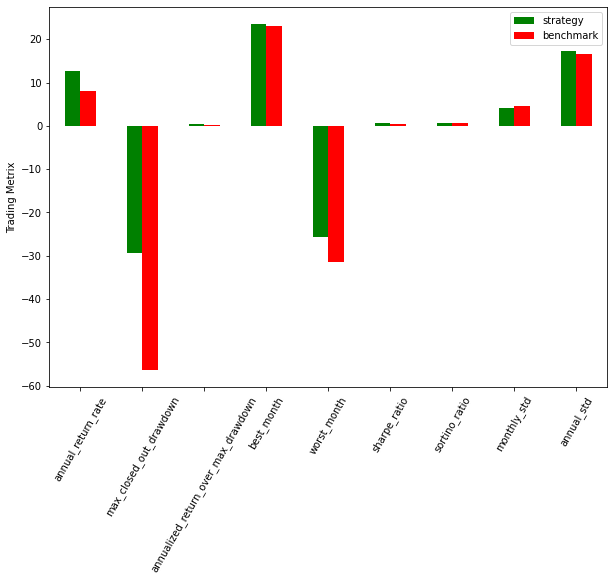

In [15]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df